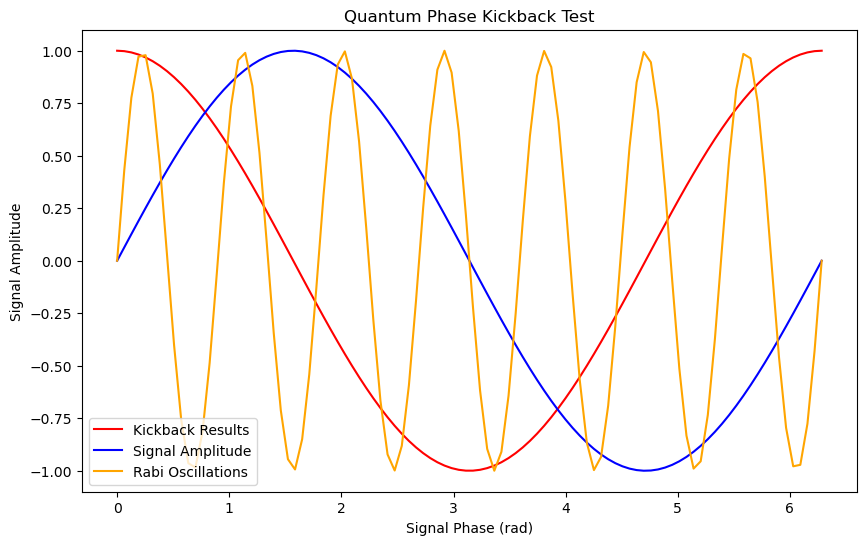

In [4]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Number of qubits
qubit_number = 7
dev = qml.device("default.qubit", wires=qubit_number)

# GHZ state preparation
def prepare_ghz_state():
    qml.Hadamard(wires=0)
    for i in range(1, qubit_number):
        qml.CNOT(wires=[0, i])

# Quantum phase kickback test
@qml.qnode(dev)
def phase_kickback(phase):
    """Applies phase shift to GHZ state and checks coherence."""
    prepare_ghz_state()
    qml.PhaseShift(phase, wires=0)
    
    # Apply inverse GHZ state preparation
    for i in range(qubit_number - 1, 0, -1):
        qml.CNOT(wires=[0, i])
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))

# Phase kickback results
phases = np.linspace(0, 2 * np.pi, 100)  # Range from 0 to 2π
kickback_results = [phase_kickback(phi) for phi in phases]

# ✅ Define sine_wave before using it
sine_wave = np.sin(phases)

# ✅ Define rabi_oscillations before using it
rabi_oscillations = np.sin(7 * phases)  # 7 peaks within 0 to 2π

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(phases, kickback_results, label="Kickback Results", color="red")
plt.plot(phases, sine_wave, label="Signal Amplitude", color="blue")  # ✅ Now sine_wave is defined
plt.plot(phases, rabi_oscillations, label="Rabi Oscillations", color="orange")  # ✅ Now rabi_oscillations is defined
plt.xlabel('Signal Phase (rad)')
plt.ylabel('Signal Amplitude')
plt.title('Quantum Phase Kickback Test')
plt.legend()
plt.show()


In [2]:
pip install pennylane

     ---------------------------------------- 0.0/55.9 kB ? eta -:--:--
     ------- -------------------------------- 10.2/55.9 kB ? eta -:--:--
     -------------------- ----------------- 30.7/55.9 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 55.9/55.9 kB 585.2 kB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 660.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.0 MB 563.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.0 MB 581.0 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.0 MB 655.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.0 MB 612.6 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/2.0 MB 655.1 kB/s eta 0:00:03
   ---- ----------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.19.0 requires pyarrow-hotfix, which is not installed.
datasets 2.19.0 requires xxhash, which is not installed.
dwave-hybrid 0.6.10 requires plucky>=0.4.3, which is not installed.
dwave-system 1.21.0 requires homebase<2.0.0,>=1.0.0, which is not installed.
minorminer 0.2.12 requires homebase>=1.0.1, which is not installed.
minorminer 0.2.12 requires rectangle-packer>=2.0.1, which is not installed.
penaltymodel 1.0.2 requires homebase<2.0.0,>=1.0.1, which is not installed.
streamlit 1.30.0 requires pydeck<1,>=0.8.0b4, which is not installed.
streamlit 1.30.0 requires toml<2,>=0.10.1, which is not installed.
streamlit 1.30.0 requires tzlocal<6,>=1.1, which is not installed.
streamlit 1.30.0 requires validators<1,>=0.2, which is not i

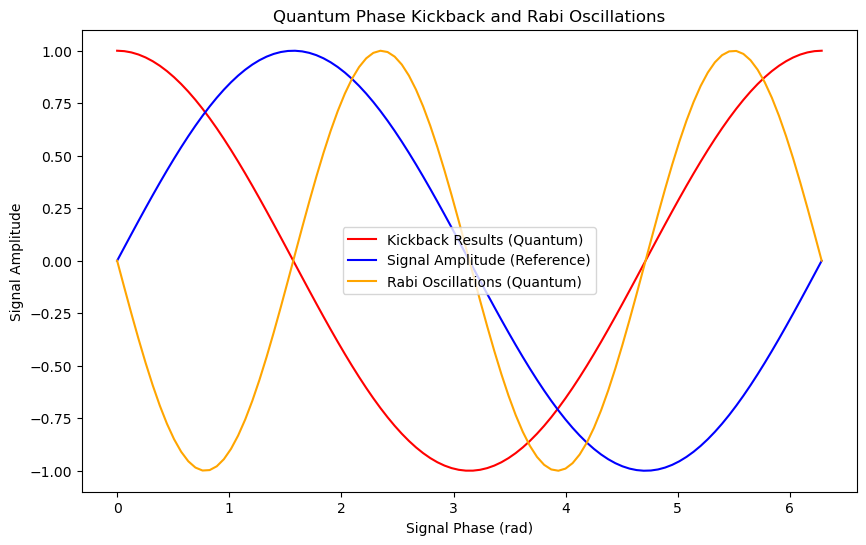

In [7]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Number of qubits
qubit_number = 7
dev = qml.device("default.qubit", wires=qubit_number)

# GHZ state preparation
def prepare_ghz_state():
    qml.Hadamard(wires=0)
    for i in range(1, qubit_number):
        qml.CNOT(wires=[0, i])

# Quantum phase kickback test
@qml.qnode(dev)
def phase_kickback(phase):
    """Applies phase shift to GHZ state and checks coherence."""
    prepare_ghz_state()
    qml.PhaseShift(phase, wires=0)
    
    # Apply inverse GHZ operation
    for i in range(qubit_number - 1, 0, -1):
        qml.CNOT(wires=[0, i])
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))

# ✅ Corrected Rabi Oscillations using a quantum circuit
@qml.qnode(dev)
def rabi_oscillation(time):
    """Simulates Rabi oscillations using repeated RX gates."""
    qml.RX(np.pi / 2, wires=0)  # Prepare qubit in |+> state

    # Apply RX gates repeatedly to simulate external driving
    for _ in range(10):  # Increasing steps to accumulate phase
        qml.RX(time * 0.2, wires=0)  # Apply RX with scaled time

    return qml.expval(qml.PauliZ(0))  # ✅ Measure in Pauli-Z basis

# Generate phase values
phases = np.linspace(0, 2 * np.pi, 100)  # Range from 0 to 2π
kickback_results = [phase_kickback(phi) for phi in phases]
rabi_results = [rabi_oscillation(t) for t in phases]  # Compute corrected quantum Rabi oscillations

# Define classical sine wave as a reference
sine_wave = np.sin(phases)

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(phases, kickback_results, label="Kickback Results (Quantum)", color="red")
plt.plot(phases, sine_wave, label="Signal Amplitude (Reference)", color="blue")
plt.plot(phases, rabi_results, label="Rabi Oscillations (Quantum)", color="orange")  # Now using real quantum data
plt.xlabel('Signal Phase (rad)')
plt.ylabel('Signal Amplitude')
plt.title('Quantum Phase Kickback and Rabi Oscillations')
plt.legend()
plt.show()
